Training started...
Processing dataset: 228_elusage.tsv
{'feature_selection__k': 2, 'regression__algorithm': 'auto', 'regression__leaf_size': 30, 'regression__metric': 'minkowski', 'regression__n_neighbors': 3, 'regression__p': 3, 'regression__weights': 'uniform'}
R-square score: 0.40


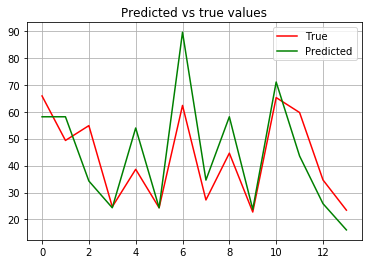

---------------------


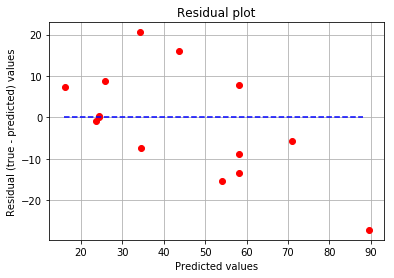

Finished dataset: 228_elusage.tsv
------------------------------------------------------------
Processing dataset: 485_analcatdata_vehicle.tsv
{'feature_selection__k': 4, 'regression__algorithm': 'auto', 'regression__leaf_size': 15, 'regression__metric': 'minkowski', 'regression__n_neighbors': 5, 'regression__p': 3, 'regression__weights': 'distance'}
R-square score: 0.66


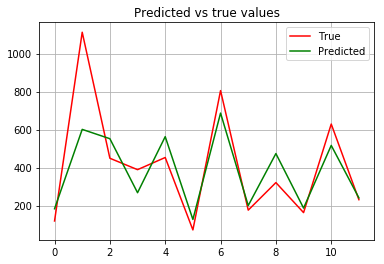

---------------------


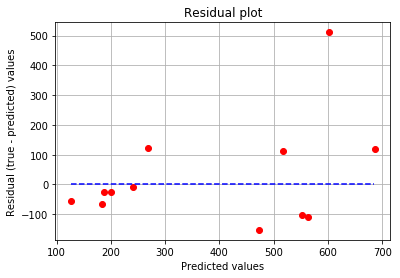

Finished dataset: 485_analcatdata_vehicle.tsv
------------------------------------------------------------
Processing dataset: 523_analcatdata_neavote.tsv
{'feature_selection__k': 1, 'regression__algorithm': 'auto', 'regression__leaf_size': 10, 'regression__metric': 'euclidean', 'regression__n_neighbors': 20, 'regression__p': 2, 'regression__weights': 'uniform'}
R-square score: 0.94


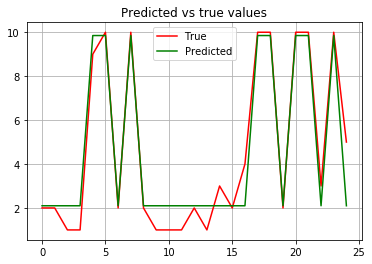

---------------------


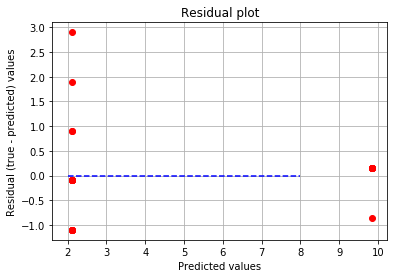

Finished dataset: 523_analcatdata_neavote.tsv
------------------------------------------------------------
Processing dataset: 663_rabe_266.tsv
{'feature_selection__k': 2, 'regression__algorithm': 'auto', 'regression__leaf_size': 50, 'regression__metric': 'minkowski', 'regression__n_neighbors': 2, 'regression__p': 3, 'regression__weights': 'distance'}
R-square score: 0.98


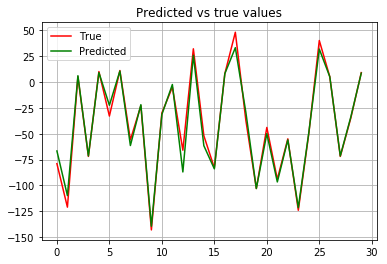

---------------------


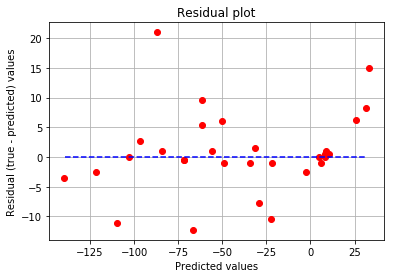

Finished dataset: 663_rabe_266.tsv
------------------------------------------------------------
Processing dataset: 687_sleuth_ex1605.tsv
{'feature_selection__k': 3, 'regression__algorithm': 'auto', 'regression__leaf_size': 10, 'regression__metric': 'euclidean', 'regression__n_neighbors': 4, 'regression__p': 2, 'regression__weights': 'distance'}
R-square score: 0.77


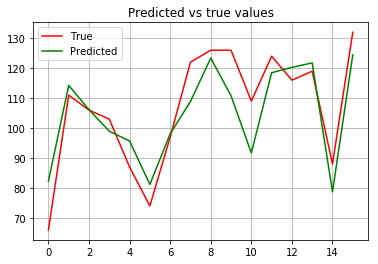

---------------------


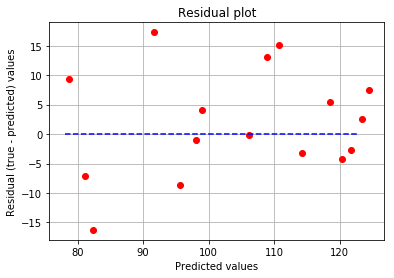

Finished dataset: 687_sleuth_ex1605.tsv
------------------------------------------------------------
Training finished
Mean R2 square: 
 0.7499703638520822
Total time taken: 495 seconds


In [4]:
import sys
import time
import pandas as pd
from sklearn import model_selection
from sklearn import neighbors, metrics, cluster
from matplotlib import pyplot as plt
import scipy
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.feature_selection import *
from sklearn.model_selection import GridSearchCV, KFold

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
start_time = time.time()
datasets = ["228_elusage.tsv", "485_analcatdata_vehicle.tsv", "523_analcatdata_neavote.tsv", \
            '663_rabe_266.tsv', '687_sleuth_ex1605.tsv']

regressor = Pipeline([
  ('preprocessing', preprocessing.RobustScaler()),
  ('feature_selection', SelectKBest(f_regression)),
  ('regression', neighbors.KNeighborsRegressor())
])

parameters = [{ \
    'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], \
    'regression__n_neighbors': [1, 2, 3, 4, 5, 10, 20], \
    'regression__weights': ['uniform', 'distance'], \
    'regression__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute' ], \
    'regression__leaf_size': [10, 15, 30, 50, 70], \
    'regression__p': [2, 3], \
    'regression__metric': ['euclidean', 'minkowski'], \
}]

print('Training started...')
dataset_accuracies = list()
r2_scores = list()
for d_set in datasets:
    print("Processing dataset: %s" % d_set)
    data_path = "data/" + d_set
    df = pd.read_csv(data_path, sep="\t")
    label = df["target"].copy()
    data = df.drop("target", axis=1)
    optimized_regressor = GridSearchCV(regressor, ard_parameters, \
                                       cv=KFold(n_splits=3, shuffle=True, random_state=3111696), \
                                       error_score=0, scoring='r2')
    optimized_regressor.fit(data, label)
    best_regressor = optimized_regressor.best_estimator_
    best_result = optimized_regressor.cv_results_
    print(optimized_regressor.best_params_)
    best_score = optimized_regressor.best_score_
    r2_scores.append(best_score)
    print("Best score: ", best_score)
    print("Finished dataset: %s" % d_set)
    print("------------------------------------------------------------")

print('Training finished')
print("Mean R2 square: \n", np.mean(r2_scores))
end_time = time.time()
print('Total time taken: %d seconds' % int(end_time - start_time))